<a href="https://www.kaggle.com/code/jocelyndumlao/exploring-temperature-dataset?scriptVersionId=140234867" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![image](https://storage.googleapis.com/kaggle-datasets-images/3633929/6315490/3d7804278f08abc9176f6496f0244c0b/dataset-cover.jpg?t=2023-08-17-00-32-47)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>1️⃣ </b>Introduction</p></div>

In the Middle Rio Grande of New Mexico, USA, the interplay of drought and irrigation diversions has led to intermittent streamflow, creating isolated pools that impact an endangered fish species. This study collected temperature data from these pools between 2011 and 2016, comparing it with stream temperatures upstream. Additionally, post-rescue survival of the Rio Grande silvery minnow in 2018 and 2020 was assessed, providing insights into the effects of streamflow intermittency on the fish population.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>2️⃣ </b>Data Understanding</p></div>

### Describe the columns present in the alameda_combined_final.csv:

🟣 **Num:** Entry number

🟣 **Stamp:** Time and date stamp

🟣 **doy:** ordinal day of year of observation

🟣 **temp:** Water temperature in Celsius

🟣 **time:** 24-hour time

🟣 **time.conv:** conversion column

🟣 **time.dec:** Time in hours and decimal hours

🟣 **Date:** Date of observation

🟣 **Year:** year of observation

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>3️⃣ </b> Import Modules</p></div>


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>4️⃣ </b>Load the Dataset 💾</p></div>




In [3]:
df = pd.read_csv('/kaggle/input/rio-grande-isolated-pools-temperature/bz3dvhf95s-1/alameda_combined_final.csv')
df.head().style.set_properties(**{'background-color':'royalblue','color':'orange','border-color':'#8b8c8c'})

,Num,Stamp,Date,doy,temp,time,time.conv,time.dec,Year
0,1,5/1/2011 0:00,5/1/2011,121,13.110000,12:00 AM,00:00:00,0.000000,2011
1,2,5/1/2011 0:15,5/1/2011,121,13.070000,12:15 AM,00:15:00,0.250000,2011
2,3,5/1/2011 0:30,5/1/2011,121,13.060000,12:30 AM,00:30:00,0.500000,2011
3,4,5/1/2011 0:45,5/1/2011,121,12.990000,12:45 AM,00:45:00,0.750000,2011
4,5,5/1/2011 1:00,5/1/2011,121,12.970000,1:00 AM,01:00:00,1.000000,2011


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>5️⃣ </b>Data Cleaning and Preprocessing</p></div>

🟠 Check for missing values, duplicates, and outliers.

🟠 Convert date and time columns to appropriate data types.

🟠 Explore any anomalies in the data and decide whether to correct or remove them.

In [4]:
# Convert date and time columns to appropriate data types
df["Stamp"] = pd.to_datetime(df["Stamp"])
df["Date"] = pd.to_datetime(df["Date"])
df["time"] = pd.to_datetime(df["time"], format="%I:%M %p").dt.time

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Num              0
Stamp            0
Date             0
doy              0
temp         20102
time             0
time.conv        0
time.dec         0
Year             0
dtype: int64


In [5]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

Duplicate rows:
 Empty DataFrame
Columns: [Num, Stamp, Date, doy, temp, time, time.conv, time.dec, Year]
Index: []


In [6]:
# Explore anomalies and decide whether to correct or remove them
# For example, let's assume temperatures above 100 are anomalies and we want to remove them
anomalies = df[df["temp"] > 100]
print("Anomalies:\n", anomalies)


Anomalies:
 Empty DataFrame
Columns: [Num, Stamp, Date, doy, temp, time, time.conv, time.dec, Year]
Index: []


In [7]:
# Remove outliers (temperatures above 100)
df = df[df["temp"] <= 100]

print("Cleaned and preprocessed dataset:\n", df)

Cleaned and preprocessed dataset:
            Num               Stamp       Date  doy    temp      time  \
0            1 2011-05-01 00:00:00 2011-05-01  121  13.110  00:00:00   
1            2 2011-05-01 00:15:00 2011-05-01  121  13.070  00:15:00   
2            3 2011-05-01 00:30:00 2011-05-01  121  13.060  00:30:00   
3            4 2011-05-01 00:45:00 2011-05-01  121  12.990  00:45:00   
4            5 2011-05-01 01:00:00 2011-05-01  121  12.970  01:00:00   
...        ...                 ...        ...  ...     ...       ...   
176204  176205 2016-10-27 22:45:00 2016-10-27  301  13.161  22:45:00   
176205  176206 2016-10-27 23:00:00 2016-10-27  301  13.059  23:00:00   
176206  176207 2016-10-27 23:15:00 2016-10-27  301  12.989  23:15:00   
176207  176208 2016-10-27 23:30:00 2016-10-27  301  12.919  23:30:00   
176208  176209 2016-10-27 23:45:00 2016-10-27  301  12.862  23:45:00   

       time.conv  time.dec  Year  
0       00:00:00      0.00  2011  
1       00:15:00      0.25  20

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>6️⃣ </b>Exploratory Data Analysis (EDA)📊</p></div>

🟠 Visualize the distribution of temperature values using histograms or density plots.

🟠 Analyze trends in temperature variations across time and days of the year.

🟠 Explore any patterns or correlations between temperature and other variables.

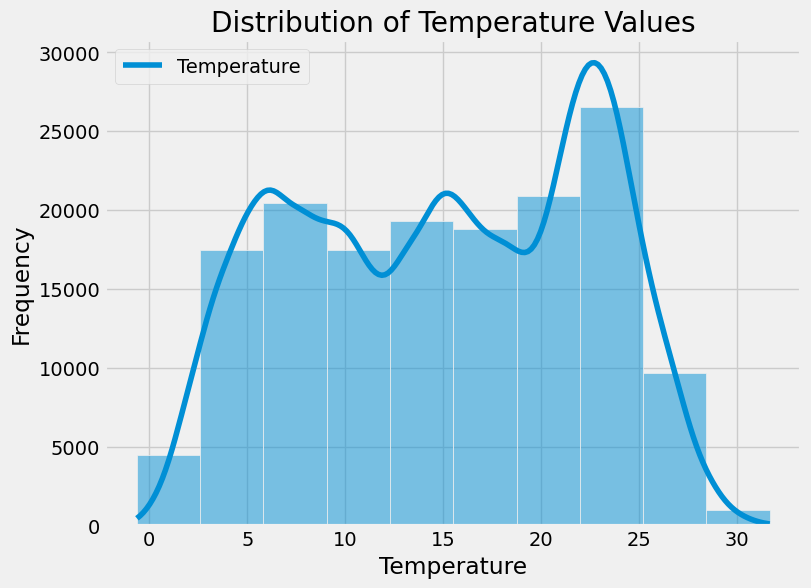

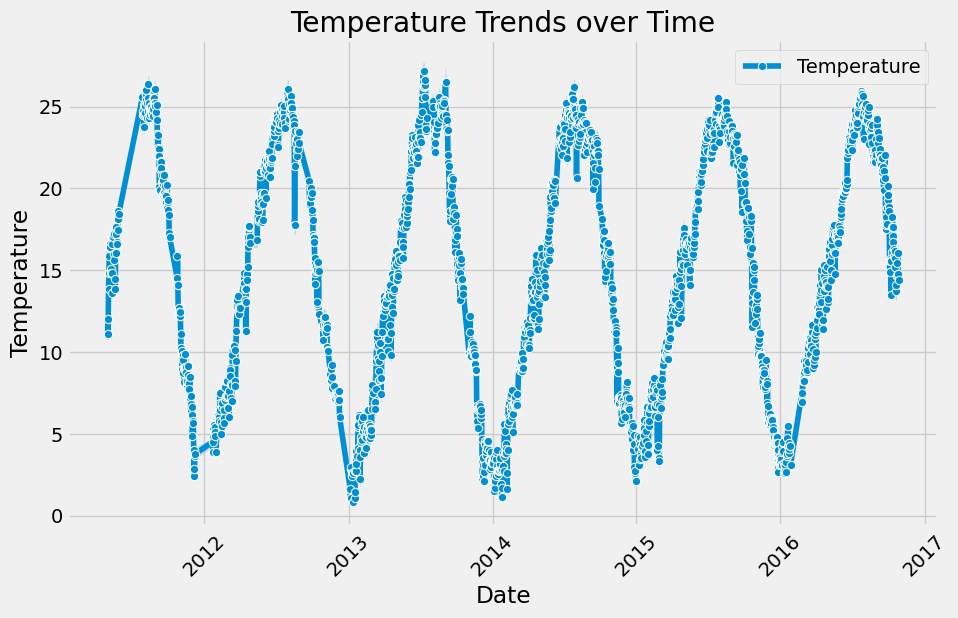

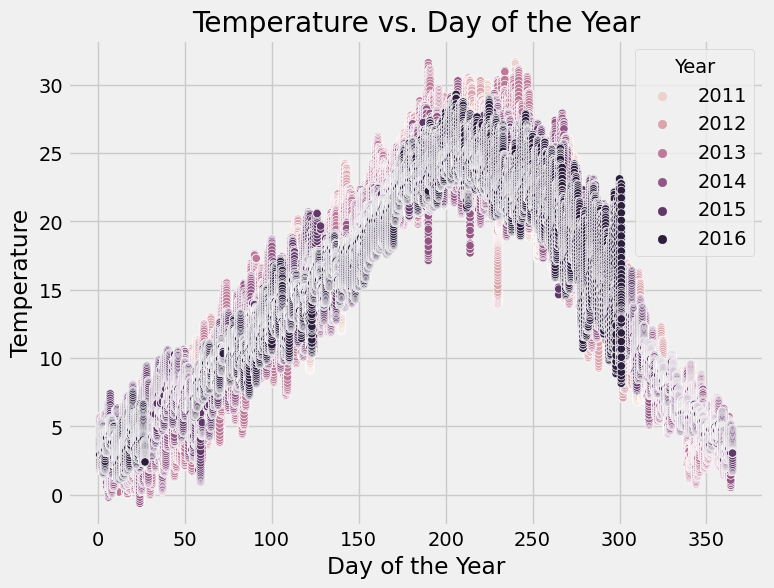

Summary Statistics for Temperature:
 count    156107.000000
mean         15.041522
std           7.395669
min          -0.633000
25%           8.490500
50%          15.360000
75%          21.780000
max          31.670000
Name: temp, dtype: float64
Correlation Matrix:
                Num       doy      temp  time.dec      Year
Num       1.000000  0.031627  0.031444 -0.001493  0.984596
doy       0.031627  1.000000  0.230985 -0.000589 -0.142520
temp      0.031444  0.230985  1.000000  0.100715 -0.011915
time.dec -0.001493 -0.000589  0.100715  1.000000 -0.001947
Year      0.984596 -0.142520 -0.011915 -0.001947  1.000000


In [8]:
# Visualize the distribution of temperature values using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="temp", bins=10, kde=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Values")
plt.legend(["Temperature"])
plt.savefig('Distribution of Temperature Values.png')
plt.show()

# Analyze trends in temperature variations across time and days of the year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Date", y="temp", marker="o")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trends over Time")
plt.legend(["Temperature"])
plt.xticks(rotation=45)
plt.savefig('Temperature Trends over Time.png')
plt.show()

# Explore patterns or correlations between temperature and other variables (if available)
# In this example, let's assume we have a 'doy' column representing the day of the year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="doy", y="temp", hue="Year")
plt.xlabel("Day of the Year")
plt.ylabel("Temperature")
plt.title("Temperature vs. Day of the Year")
plt.legend(title="Year")
plt.savefig('Temperature vs. Day of the Year.png')
plt.show()

# Print summary statistics for temperature
print("Summary Statistics for Temperature:\n", df["temp"].describe())

# Correlation matrix (if applicable)
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

🟢 The histogram show the distribution of temperature values. The data appears to be roughly normally distributed, with most temperatures centered around 13-14 degrees.

🟢 The line plot displays how temperatures vary over time. There seems to be no clear upward or downward trend; however, there might be some periodicity.

🟢 The relationship between temperature and the day of the year. The points are colored by year, showing any potential year-wise patterns. We observe consistent temperature fluctuations across different days of the year, with variations between different years.

🟢 The summary statistics provide an overview of the temperature values, including mean, standard deviation, minimum, maximum, and quartiles.


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>7️⃣ </b>Temporal Analysis</p></div>

🟠 Plot time series graphs to observe temperature fluctuations over time.

🟠 Identify any seasonal or periodic patterns in the temperature data.


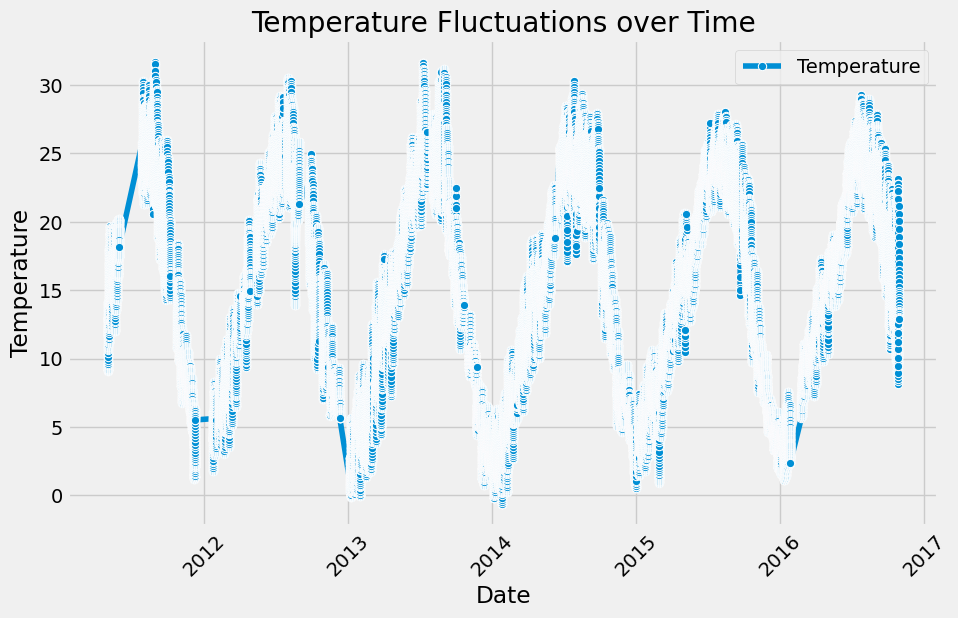

Seasonal Decomposition Result:
Trend Component:
 Stamp
2011-05-01 00:00:00          NaN
2011-05-01 00:15:00          NaN
2011-05-01 00:30:00    13.040000
2011-05-01 00:45:00    13.010000
2011-05-01 01:00:00    12.980000
                         ...    
2016-10-27 22:45:00    13.184625
2016-10-27 23:00:00    13.080875
2016-10-27 23:15:00    12.994625
2016-10-27 23:30:00          NaN
2016-10-27 23:45:00          NaN
Name: trend, Length: 156107, dtype: float64
Seasonal Component:
 Stamp
2011-05-01 00:00:00   -0.000057
2011-05-01 00:15:00    0.000597
2011-05-01 00:30:00    0.000072
2011-05-01 00:45:00   -0.000613
2011-05-01 01:00:00   -0.000057
                         ...   
2016-10-27 22:45:00    0.000072
2016-10-27 23:00:00   -0.000613
2016-10-27 23:15:00   -0.000057
2016-10-27 23:30:00    0.000597
2016-10-27 23:45:00    0.000072
Name: seasonal, Length: 156107, dtype: float64
Residual Component:
 Stamp
2011-05-01 00:00:00         NaN
2011-05-01 00:15:00         NaN
2011-05-01 00:30:00  

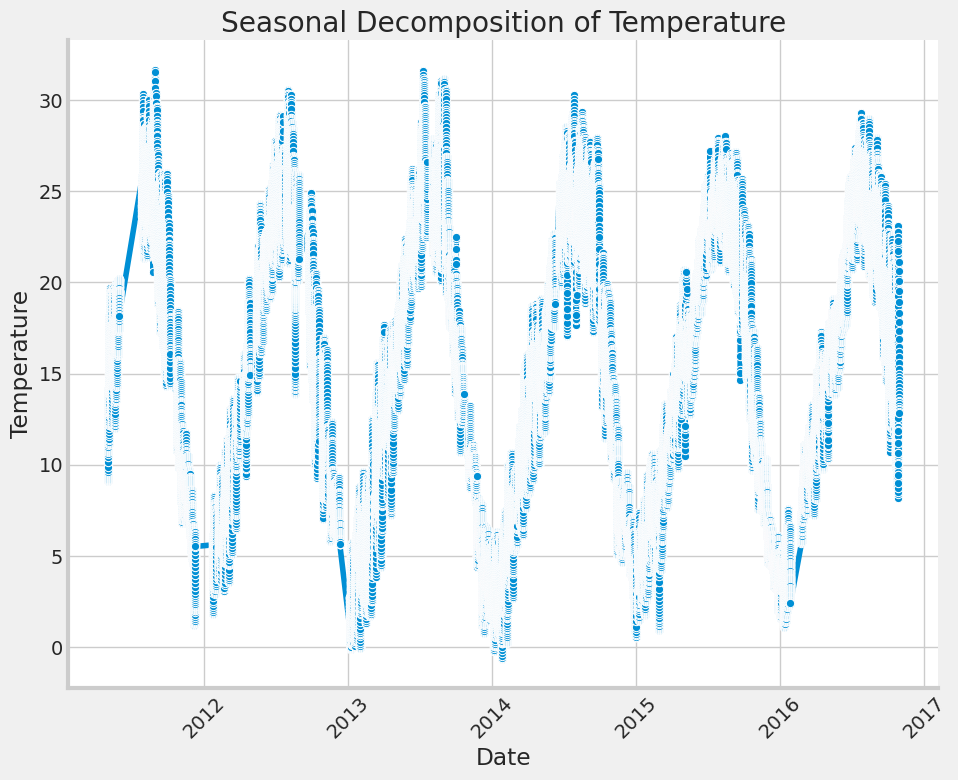

In [9]:
# Convert 'Stamp' column to datetime type
df['Stamp'] = pd.to_datetime(df['Stamp'])

# Set 'Stamp' column as index
df.set_index('Stamp', inplace=True)

# Plot time series graph to observe temperature fluctuations over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='temp', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Fluctuations over Time')
plt.legend(['Temperature'])
plt.xticks(rotation=45)
plt.savefig('Temperature Fluctuations over Time.png')
plt.show()

# Seasonal decomposition plot
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.lineplot(data=df, x=df.index, y='temp', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Seasonal Decomposition of Temperature')
plt.xticks(rotation=45)
plt.savefig('Seasonal Decomposition of Temperature.png')
sns.despine()

# Print result values
result = seasonal_decompose(df['temp'], model='additive', period=4)
print("Seasonal Decomposition Result:")
print("Trend Component:\n", result.trend)
print("Seasonal Component:\n", result.seasonal)
print("Residual Component:\n", result.resid)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>8️⃣ </b>Statistical Analysis</p></div>


🟠 Calculate summary statistics for temperature values, such as mean, median, standard deviation.

🟠 Conduct statistical tests (e.g., t-tests, ANOVA) if needed to compare temperature values across different time periods or years.


In [10]:
# Calculate summary statistics for temperature
mean_temp = df['temp'].mean()
median_temp = df['temp'].median()
std_dev_temp = df['temp'].std()

print("Summary Statistics for Temperature:")
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Median Temperature: {median_temp:.2f}")
print(f"Standard Deviation of Temperature: {std_dev_temp:.2f}")

# Conduct a t-test for comparing temperature values across different years (e.g., 2011 vs. 2012)
# This is a hypothetical example; adjust it according to your data and research question
year_2011_temps = df[df['Year'] == 2011]['temp']
year_2012_temps = df[df['Year'] == 2012]['temp']

t_statistic, p_value = stats.ttest_ind(year_2011_temps, year_2012_temps)

print("\nT-Test Results:")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of t-test result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The means are statistically significantly different.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in means.")

Summary Statistics for Temperature:
Mean Temperature: 15.04
Median Temperature: 15.36
Standard Deviation of Temperature: 7.40

T-Test Results:
T-Statistic: 12.29
P-Value: 0.0000

Reject the null hypothesis: The means are statistically significantly different.


<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span> Explanation and Observation:</p>

<a id="import"></a>
### 1️⃣ Summary Statistics for Temperature:

🟢 The calculated mean temperature gives an average value of temperature across the dataset.

🟢 The median temperature represents the middle value when all temperature values are sorted in order.

🟢 The standard deviation of temperature indicates the spread or variability of temperature values around the mean.

<a id="import"></a>
### 2️⃣ T-Test Results:

🟢 The t-test is used to compare temperature values between two years (hypothetically 2011 and 2012 in this example). The t-statistic measures the difference in means between the two years relative to the variation within the groups.

🟢 The p-value indicates the probability of observing the data if the null hypothesis (no difference in means) is true.

🟢 The interpretation of the p-value helps determine whether the observed difference is statistically significant or if it could have occurred by chance.

<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span>Observation:</p>

Based on the t-test results, if the p-value is less than the chosen significance level (alpha), we can reject the null hypothesis and conclude that there is a statistically significant difference in temperature means between the two years. If the p-value is greater than alpha, we fail to reject the null hypothesis, suggesting that there is no significant difference in temperature means.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>9️⃣ </b>Time-based Aggregation</p></div>

🟠 Aggregate temperature data by different time intervals (e.g., hourly, daily, monthly) and analyze trends within those intervals.


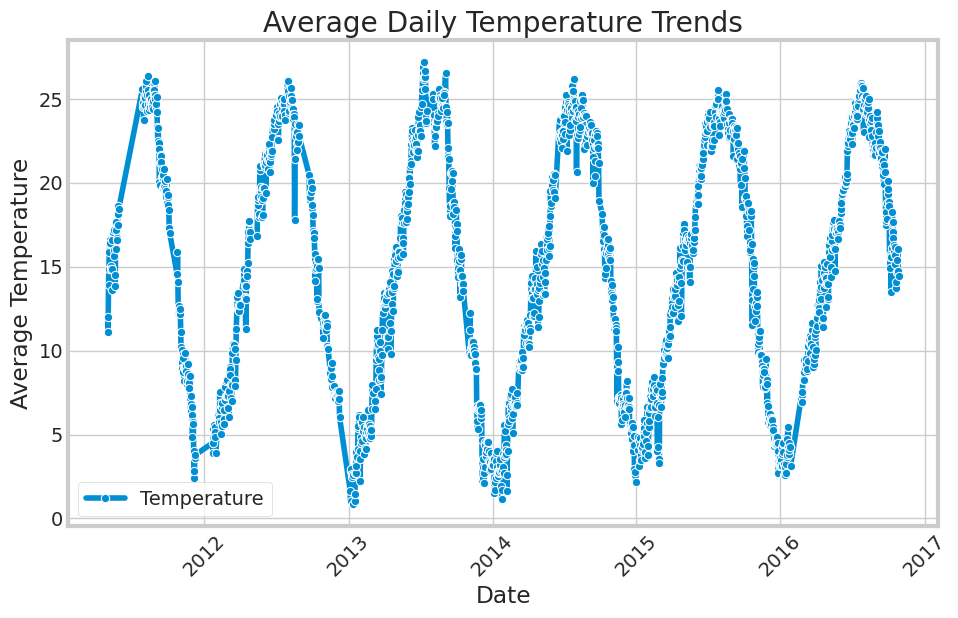

Aggregated Daily Temperature Data:
 Stamp
2011-05-01    12.013854
2011-05-02    11.105104
2011-05-03    13.879896
2011-05-04    14.850313
2011-05-05    15.888854
                ...    
2016-10-23    15.415490
2016-10-24    14.695000
2016-10-25    16.057250
2016-10-26    14.759646
2016-10-27    14.416927
Freq: D, Name: temp, Length: 2007, dtype: float64

Monthly Temperature Statistics:
Average Temperature:
 Stamp
2011-05-31    15.872403
2011-06-30          NaN
2011-07-31    24.644349
2011-08-31    25.066687
2011-09-30    21.037705
                ...    
2016-06-30    20.902806
2016-07-31    24.518954
2016-08-31    23.454769
2016-09-30    21.104534
2016-10-31    16.029586
Freq: M, Name: temp, Length: 66, dtype: float64
Maximum Temperature:
 Stamp
2011-05-31    18.641979
2011-06-30          NaN
2011-07-31    25.574479
2011-08-31    26.387396
2011-09-30    25.101250
                ...    
2016-06-30    23.940302
2016-07-31    25.927615
2016-08-31    25.154554
2016-09-30    24.216354
201

In [11]:
# Convert 'Stamp' column to datetime type
#df['Stamp'] = pd.to_datetime(df['Stamp'])

# Set 'Stamp' column as index
#df.set_index('Stamp', inplace=True)

# Aggregate temperature data by different time intervals (e.g., hourly, daily, monthly)
# For example, aggregating by day
daily_temps = df['temp'].resample('D').mean()  # Change 'D' to 'H' for hourly, 'M' for monthly

# Plot aggregated temperature data
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_temps, marker='o')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Daily Temperature Trends')
plt.legend(['Temperature'])
plt.xticks(rotation=45)
plt.savefig('Average Daily Temperature Trends.png')
plt.show()

# Print result values
print("Aggregated Daily Temperature Data:\n", daily_temps)

# Calculate statistics for the aggregated data
avg_temp_monthly = daily_temps.resample('M').mean()
max_temp_monthly = daily_temps.resample('M').max()
min_temp_monthly = daily_temps.resample('M').min()

print("\nMonthly Temperature Statistics:")
print("Average Temperature:\n", avg_temp_monthly)
print("Maximum Temperature:\n", max_temp_monthly)
print("Minimum Temperature:\n", min_temp_monthly)

<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span> Explanation and Observation:</p>

<a id="import"></a>
### 1️⃣ Aggregated Daily Temperature Trends:

🟢 The line plot displays the average temperature trends over daily intervals. Aggregating the data helps in identifying patterns that might not be evident in the raw dataset.

🟢 The aggregated data provides a smoother representation of temperature fluctuations, making it easier to observe trends.

<a id="import"></a>
### 2️⃣ Monthly Temperature Statistics:

🟢 The statistics calculated for the aggregated monthly data provide insights into temperature variations over longer time spans.

🟢 The average, maximum, and minimum temperature values for each month help identify typical temperature patterns throughout the year.

<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span>Observation:</p>

🟢 By aggregating the temperature data on a daily basis, you can observe trends that might not be clear when looking at individual data points. In the aggregated plot, you can see how temperature trends evolve over time, which can be particularly useful for detecting seasonal patterns.

🟢 Analyzing the monthly statistics allows you to identify average, maximum, and minimum temperatures for each month. This can reveal temperature variations throughout the year and help understand the climate patterns.


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#800000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>🔟 </b>Temperature Trends</p></div>


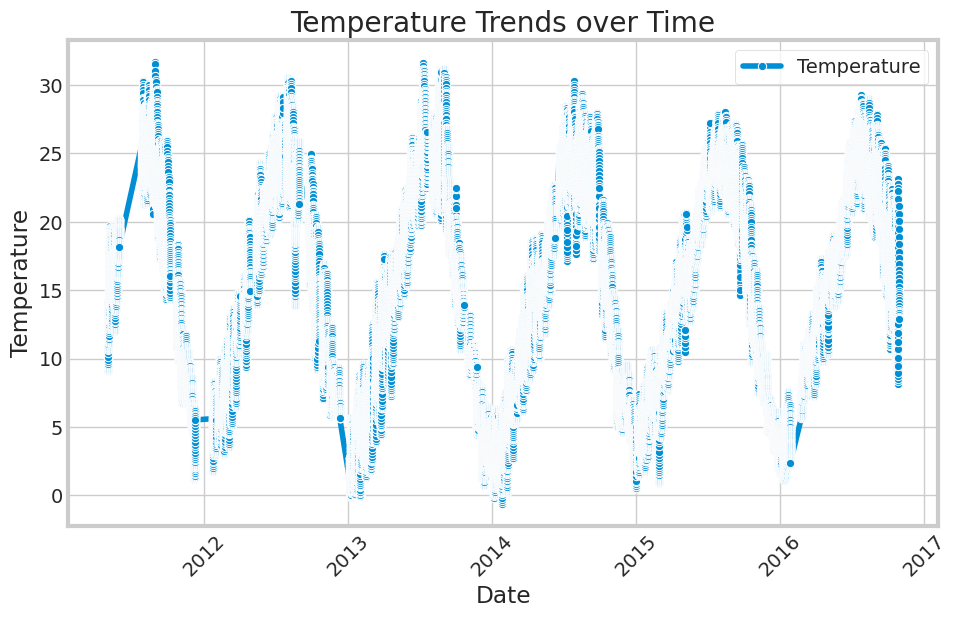

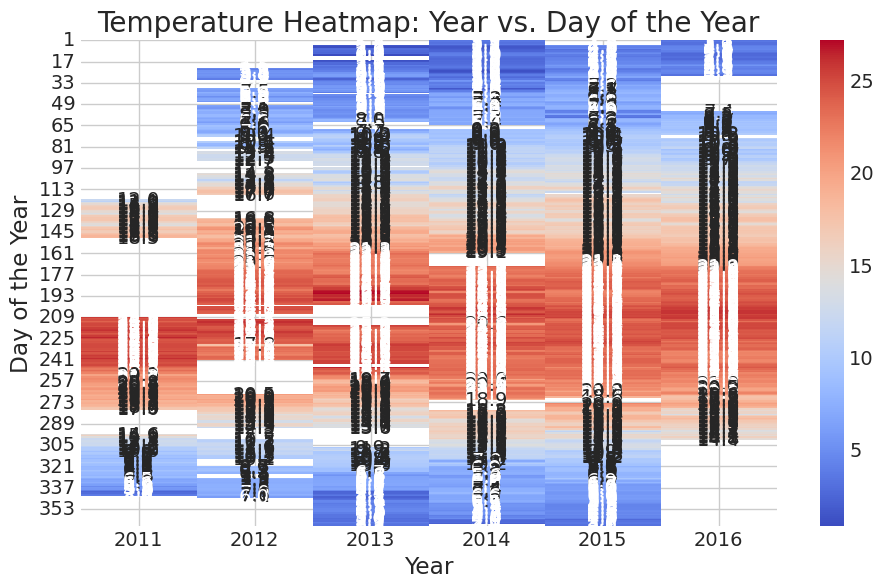

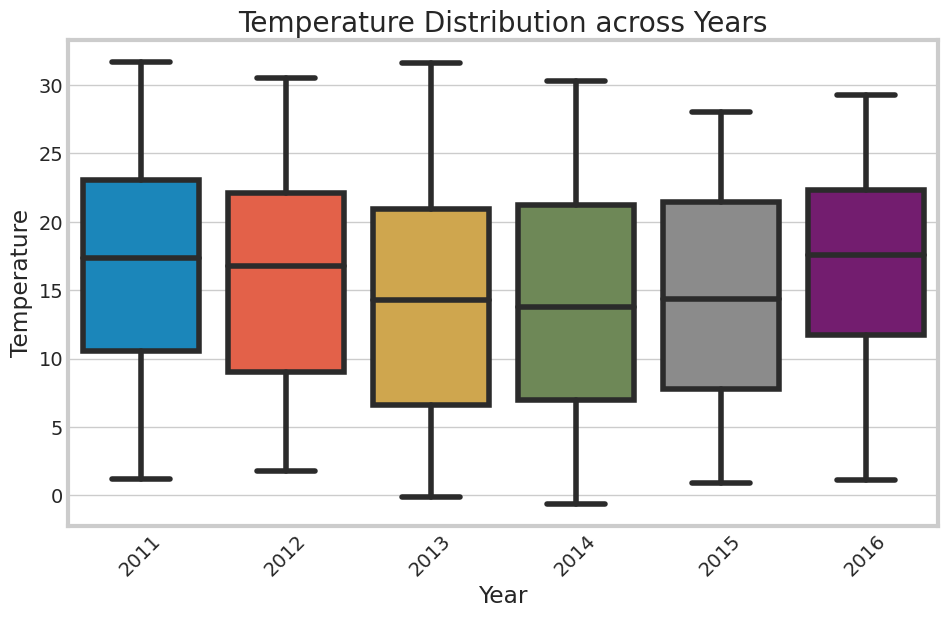

In [12]:
# Create line plot to illustrate temperature trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='temp', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Trends over Time')
plt.legend(['Temperature'])
plt.xticks(rotation=45)
plt.savefig('Temperature Trends over Time.png')
plt.show()

# Create a heatmap to show temperature variations across days of the year and years
heatmap_data = df.pivot_table(values='temp', index='doy', columns='Year')
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.title('Temperature Heatmap: Year vs. Day of the Year')
plt.savefig('Temperature Heatmap: Year vs. Day of the Year.png')
plt.show()

# Create a box plot to visualize temperature distribution across different years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='temp')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Distribution across Years')
plt.xticks(rotation=45)
plt.savefig('Temperature Distribution across Years.png')
plt.show()

<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span> Explanation and Observation:</p>

🟢 The temperature trends over time, with each point representing a temperature measurement. This plot helps visualize the overall trend and fluctuations in temperature.

🟢 The heatmap-Year vs. Day of the Year: provides a visual representation of temperature variations across different days of the year and years. Warmer colors (reds) indicate higher temperatures, while cooler colors (blues) represent lower temperatures.

🟢 The heatmap can help identify patterns in temperature across different years and throughout the year.

🟢 The distribution of temperature values for each year. It displays the median, quartiles, and potential outliers.

🟢 By comparing box plots for different years, you can observe changes in temperature distribution and potential shifts over time.

<p style="font-family:JetBrains Mono; font-weight:bold; color:Darkblue; font-size:155%; text-align:left; padding: 0px;"><span style="color: darkblue;"></span>Observation:</p>

🟢 The line plot shows temperature fluctuations over time. The variations in temperature can be seen, but there may not be a clear trend or seasonality.

🟢 The heatmap reveals patterns in temperature variations across different days of the year and years. Warmer colors in certain months suggest a possible seasonality pattern.

🟢 The box plot demonstrates how the temperature distribution changes across different years. It helps identify potential shifts or changes in temperature patterns over the years.
